# Introduction à `Tensorflow`.

## Introduction à la création et l'entraînement de réseaux neuronaux.

`Tensorflow` est une bibliothèque open-source développée par Google, qui facilite la création et l'entraînement de modèles de machine learning et de réseaux neuronaux. Elle offre des outils puissants pour construire des modèles complexes d'apprentissage supervisé et non supervisé, en particulier ceux utilisant des réseaux neuronaux profonds.

### 1. Qu'est-ce qu'un réseau neuronal ?

Un réseau neuronal est un modèle inspiré du fonctionnement du cerveau humain, composé de noeuds (neurones) organisés en couches. Les principales couches d'un réseau neuronal sont :
- Couche d'entrée, la couche qui reçoit les données d'entrée.
- Couches cachées, les couches intermédiaires qui effectuent des calcules et des transformations sur les données.
- Couche de sortie, la couche qui produit les résultats du réseau, correspondant aux classifications, prédictions ou autres sorties désirées.

### 2. Création d'un réseau neuronal avec `Tensorflow`.

Avec `Tensorflow`, la création d'un réseau neuronal se fait principalement via l'API Keras, qui est intégrée à `Tensorflow`. Voici un exemple de base pour créer un réseau neuronal pour un problème de classification d'images, type `MNIST`.

`MNIST` (Modified National Institute of Standards and Technology databse) est un jeu de données classique pour l'apprentissage automatique. Il contient :
- 60 000 images d'entraînement : des chiffres manuscrits (28 * 28 picels en niveaux de gris).
- 10 000 images de test.
Chaque image est accompagnée d'un label indiquant le chiffre qu'elle représente (de 0 à 9).

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# verification de la version de tensorflow
print(f"Tensoflow version : {tf.__version__}")

Tensoflow version : 2.11.0


### 3. Chargement du jeux de données.

In [9]:
# Chargement du jeu de données MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Affichage des dimensions des données
print(f"dimensions des données d'entraînement : {X_train.shape}, Labels : {y_train.shape}")
print(f"dimensions des données de test : {X_test.shape}, labels : {y_test.shape}")

11490434/11490434 [==============================] - 1s 0us/step
dimensions des données d'entraînement : (60000, 28, 28), Labels : (60000,)
dimensions des données de test : (10000, 28, 28), labels : (10000,)


- `X_train` est un tableau contenant les images d'entraînement (60 000, 28, 28), où chaque image est représentée comme une matrice 28x28 de valeurs de pixels.
- `y_train` est un tableau contenant les labels associés aux images d'entraînement. Chaque label est un entier entre 0 et 9 indiquant quel chiffre est représenté.
- `X_test` est un tableau contenant les images de test (10 000, 28, 28).
- `y_test` est un tableau contenant les labels de test associés aux images de test.

### 4. Visualisation des données.

Avant de commencer l'entraînement, visualisons quelques exemples pour comprendre ce que ocntient le jeu de données.

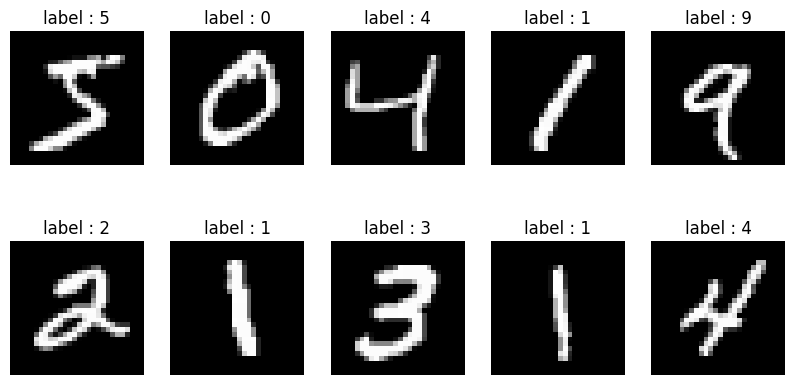

In [10]:
import matplotlib.pyplot as plt

# affichage de quelques images d'entraînement
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"label : {y_train[i]}")
    plt.axis("off")
plt.show()

### 5. Prétraitement des données.

Le prétraitement est une étape importante pour rendre les données utilisables par le modèle. Cela inclut la normalisation des pixels et l'encodage des labels.

In [11]:
# normalisation des pixels
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# ajout d'une dimension pour les canaux (nécessaire pour les CNN)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# encodage des labels en one-hot
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

#### Détail sur l'encodage one-hot.
L'encodage one-hot transforme les labels (0 à 9) en vecteurs binaires.
- Exemple, pour un label `3`, l'encodage devient `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
- Paramètres
    - `y_train` les labels d'origine.
    - 10 le nombre total de classes (de 0 à 9).
    
### 6. Construciton du modèle de classification.

Nous utilisons un réseau de neurones convolutifs (CNN) pour extraire les caractéristiques des images et effectuer la classification.

In [13]:
# Construction du modèle
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# affichage du résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

#### Explication des couches du modèle.
1. `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1))`
    - Crée une couche convolutive avec 32 filtres de taille 3x3.
    - `input_shape=(28, 28, 1)` indique la taille des images d'entrée (28x28) pixels, 1 canal pour les images en niveaux de gris.
    - L'activation relu (Rectified Linear Unit) applique une fonction non linéaire pour introduire de la complexité au modèle.
2. `MaxPooling2D((2, 2))`
    - Effectue un sous-échantillonnage spatial en prenant le maximum dans chaque région `2x2`.
    - Réduit la taille de l'image, limitant la complexité et le surapprentissage.
3. `Flatten()`
    - Aplatie les données en une seule dimension pour les connecter aux couches denses.
4. `Dense(128, activation="relu")`
    - Ajoute une couche dense avec 128 neurones.
    - L'activation relu permet de modéliser des relations non linéaires.
5. `Dense(10, activation="softmax")`
    - La couche de sortie contient 10 neurones (une par classe).
    - L'activation softmax convertit les scores en probabilités.

### 7. Compilation du modèle.

Le modèle doit être compilé avec une fonction de perte et un optimiseur.

In [15]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

- `optimizer="adam"` Algorithme d'optimisation adaptative.
- `loss="categorical_crossentropy"` Fonction de perte utilisée pour les problèmes de classification multiclasse.
- `metrics=['accuracy']` Suivi de la précision du modèle pendant l'entraînement.

### 8. Entraînement du modèle.

In [17]:
history = model.fit(X_train, y_train_onehot, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


2025-01-11 18:56:24.426839: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 17s 21ms/step - loss: 0.1809 - accuracy: 0.9457 - val_loss: 0.0746 - val_accuracy: 0.9768
Epoch 2/5
750/750 [==============================] - 15s 21ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0527 - val_accuracy: 0.9856
Epoch 3/5
750/750 [==============================] - 15s 21ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 4/5
750/750 [==============================] - 15s 21ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0397 - val_accuracy: 0.9890
Epoch 5/5
750/750 [==============================] - 15s 20ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0481 - val_accuracy: 0.9878


- `epochs=5`, nombre d'époques (passe complète sur les données d'entraînement).
- `batch_size=64`, nombre d'exemples traités à la fois.
- `validation_split=0.2`, fraction des données utilisée pour la validation.

### 9. Évaluation sur le jeu de test.

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Précision sur le jeu de test : {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.0357 - accuracy: 0.9894
Précision sur le jeu de test : 98.94%


- `test_loss`, la perte calculée sur le jeu de test (mesure d'erreur).
- `test_accuracy`, la précision du modèle sur les données de test.

### 10.Analyse des résultats.